# Used Car Listings: Features and Price Prediction

* By John David

# About Dataset
## Dataset Description
This dataset contains information about used car listings obtained through data scraping from cars.com. The dataset includes various features of the cars such as brand, model, year, mileage, engine details, transmission type, fuel type, drivetrain, and more. Additionally, it provides details about specific features like adaptive cruise control, navigation system, power liftgate, backup camera, and others.

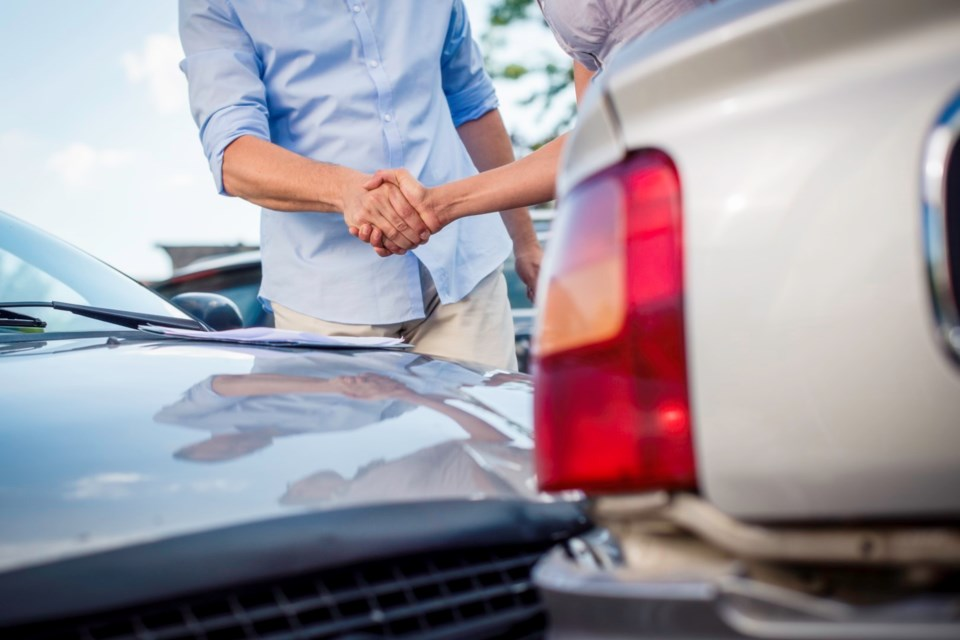

The purpose of this dataset is to facilitate the development and evaluation of machine learning models for car price prediction. The dataset can be used for tasks such as regression analysis, feature engineering, and model training.

Please note that the dataset is collected from a specific source and represents a snapshot of used car listings at a particular point in time. The dataset may contain missing values and some discrepancies. It is recommended to perform data preprocessing and exploratory analysis before using it for research or predictive modeling.

We hope that this dataset serves as a valuable resource for the data science community and contributes to the advancement of automotive analytics and pricing models.

# Feature Descriptions
* brand: Brand of the car.
* model: Model of the car.
* year: Year of production of the car.
* mileage: Mileage of the car.
* engine: Information about the car's engine.
* engine_size: Size of the car's engine.
* transmission: Type of transmission of the car.
* automatic_transmission: A binary value indicating the presence of automatic transmission (1: Yes, 0: No).
* fuel_type: Fuel type of the car.
* drivetrain: Drivetrain type of the car.
* min_mpg: Minimum fuel efficiency of the car.
* max_mpg: Maximum fuel efficiency of the car.
* damaged: A binary value indicating the presence of damage in the car (1: Yes, 0: No).
* first_owner: Is the car a 1-owner vehicle? (1: Yes, 0: No).
* personal_using: Is the car for personal use only? (1: Yes, 0: No).
* turbo: A binary value indicating the presence of a turbocharger in the car (1: Yes, 0: No).
* alloy_wheels: Are there alloy wheels on the car? (1: Yes, 0: No).
* adaptive_cruise_control: A binary value indicating the presence of adaptive cruise control (1: Yes, 0: No).
* navigation_system: A binary value indicating the presence of a navigation system (1: Yes, 0: No).
power_liftgate: A binary value indicating the presence of a power liftgate (1: Yes, 0: No).
* backup_camera: A binary value indicating the presence of a backup camera (1: Yes, 0: No).
* keyless_start: A binary value indicating the presence of keyless start system (1: Yes, 0: No).
* remote_start: A binary value indicating the presence of a remote start system (1: Yes, 0: No).
* sunroof/moonroof: A binary value indicating the presence of a sunroof/moonroof (1: Yes, 0: No).
* automatic_emergency_braking: A binary value indicating the presence of automatic emergency braking system (1: Yes, 0: No).
* stability_control: A binary value indicating the presence of stability control system (1: Yes, 0: No).
* leather_seats: Are there leather seats in the car? (1: Yes, 0: No).
* memory_seat: Are there memory seats in the car? (1: Yes, 0: No).
* third_row_seating: A binary value indicating the presence of third row seating (1: Yes, 0: No).
* apple_car_play/android_auto: A binary value indicating the presence of Apple CarPlay / Android Auto integration (1: Yes, 0: No).
* bluetooth: A binary value indicating the presence of Bluetooth connectivity (1: Yes, 0: No).
* usb_port: A binary value indicating the presence of USB ports (1: Yes, 0: No).
* heated_seats: Are there heated seats in the car? (1: Yes, 0: No).
* interior_color: Interior color of the car.
* exterior_color: Exterior color of the car.
* price: Price of the car. This feature is the target feature of this dataset.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
import os

# Loading the dataset

In [2]:
# Train dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print('TRAIN DATASET SHAPE: ', train.shape)
print('TEST DATASET SHAPE: ', test.shape)

TRAIN DATASET SHAPE:  (19109, 36)
TEST DATASET SHAPE:  (4778, 36)


## Train dataset

In [3]:
# train dataset view
train.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595


# Data preprocessing 1

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

## Test dataset

In [5]:
# test dataset
test.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,FIAT,124 Spider Lusso,2020.0,30830.0,1.4L I4 16V MPFI SOHC Turbo,1.4,6-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Saddle,Forte Black Metallic,26500
1,Lexus,RX 450h F Sport,2019.0,58274.0,3.5L V6 24V PDI DOHC Hybrid,3.5,Automatic CVT,1.0,Hybrid,Four-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,Rioja Red,Nightfall Mica,36987
2,Kia,Stinger GT1,2018.0,69303.0,3.3L V6 24V GDI DOHC Twin Turbo,3.3,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,Black,HiChroma Red,26997
3,MINI,Convertible Cooper S,2023.0,5026.0,2.0L I4 16V GDI DOHC Turbo,2.0,Automatic,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Carbon Black,Chili Pepper Red,37923
4,Nissan,Murano S,2018.0,61180.0,3.5L V6 24V MPFI DOHC,3.5,Automatic CVT,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Graphite,Gun Metallic,20490


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        4777 non-null   object 
 1   model                        4777 non-null   object 
 2   year                         4777 non-null   float64
 3   mileage                      4777 non-null   float64
 4   engine                       4771 non-null   object 
 5   engine_size                  4493 non-null   float64
 6   transmission                 4760 non-null   object 
 7   automatic_transmission       4777 non-null   float64
 8   fuel_type                    4777 non-null   object 
 9   drivetrain                   4777 non-null   object 
 10  min_mpg                      4032 non-null   float64
 11  max_mpg                      4032 non-null   float64
 12  damaged                      4723 non-null   float64
 13  first_owner       

In [7]:
df = pd.concat([train, test])
df.reset_index(drop=True, inplace=True)

In [8]:
df.nunique()

brand                             25
model                           3789
year                              63
mileage                        21313
engine                          1289
engine_size                       64
transmission                     205
automatic_transmission             2
fuel_type                         10
drivetrain                         5
min_mpg                           55
max_mpg                           58
damaged                            2
first_owner                        2
personal_using                     2
turbo                              2
alloy_wheels                       2
adaptive_cruise_control            2
navigation_system                  2
power_liftgate                     2
backup_camera                      2
keyless_start                      2
remote_start                       2
sunroof/moonroof                   2
automatic_emergency_braking        2
stability_control                  2
leather_seats                      2
m

In [9]:
df.describe()

,year,mileage,engine_size,automatic_transmission,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,...,sunroof/moonroof,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats
count,23884.000000,23884.000000,22353.000000,23884.000000,20135.000000,20135.000000,23663.000000,23492.000000,23641.000000,23884.000000,...,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000,23884.000000
mean,2017.765701,48137.358776,2.979636,0.917518,20.833126,27.820685,0.218654,0.518304,0.717905,0.404706,...,0.411489,0.173254,0.949715,0.696491,0.483085,0.148677,0.387163,0.869997,0.354296,0.483462
std,4.975234,38084.892846,5.777195,0.275103,5.991664,6.487040,0.413342,0.499675,0.450029,0.490845,...,0.492114,0.378475,0.218536,0.459783,0.499724,0.355777,0.487112,0.336314,0.478309,0.499737
min,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,19514.500000,2.000000,1.000000,17.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2019.000000,39428.000000,2.500000,1.000000,20.000000,28.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2021.000000,68611.750000,3.500000,1.000000,24.000000,31.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2024.000000,383614.000000,454.000000,1.000000,89.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23887 entries, 0 to 23886
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        23884 non-null  object 
 1   model                        23884 non-null  object 
 2   year                         23884 non-null  float64
 3   mileage                      23884 non-null  float64
 4   engine                       23833 non-null  object 
 5   engine_size                  22353 non-null  float64
 6   transmission                 23764 non-null  object 
 7   automatic_transmission       23884 non-null  float64
 8   fuel_type                    23884 non-null  object 
 9   drivetrain                   23884 non-null  object 
 10  min_mpg                      20135 non-null  float64
 11  max_mpg                      20135 non-null  float64
 12  damaged                      23663 non-null  float64
 13  first_owner     

In [11]:
df.isnull().sum()

brand                             3
model                             3
year                              3
mileage                           3
engine                           54
engine_size                    1534
transmission                    123
automatic_transmission            3
fuel_type                         3
drivetrain                        3
min_mpg                        3752
max_mpg                        3752
damaged                         224
first_owner                     395
personal_using                  246
turbo                             3
alloy_wheels                      3
adaptive_cruise_control           3
navigation_system                 3
power_liftgate                    3
backup_camera                     3
keyless_start                     3
remote_start                      3
sunroof/moonroof                  3
automatic_emergency_braking       3
stability_control                 3
leather_seats                     3
memory_seat                 

<Axes: >

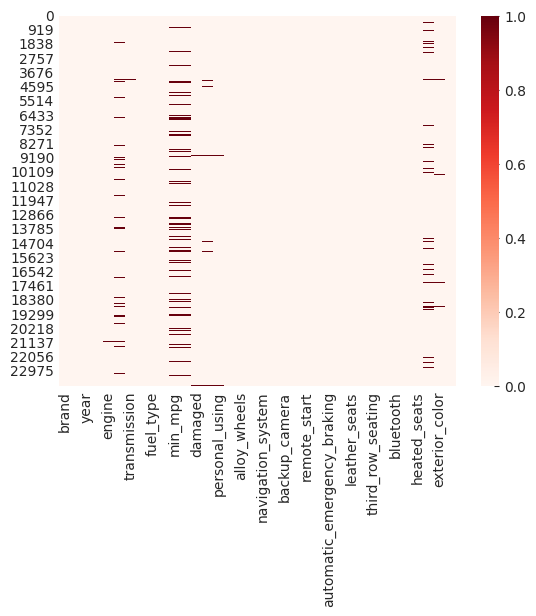

In [12]:
sns.heatmap(df.isnull(), cmap='Reds')

In [13]:
df1 = df.dropna()
df1.reset_index(drop=True, inplace=True)

In [14]:
df1

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Honda,Pilot Special Edition,2021.0,51299.0,3.5L V6 24V GDI SOHC,3.5,9-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,Black,Modern Steel Metallic,35999
1,Mercedes-Benz,GL-Class GL 450 4MATIC,2014.0,79279.0,4.7L V8 32V GDI DOHC Twin Turbo,4.7,7-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,Black,Obsidian Black Metallic,22349
2,Mitsubishi,Outlander Sport SE,2021.0,31976.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Gray,Silver,19499
3,Porsche,968,1994.0,92025.0,3.0L I4 16V MPFI DOHC,3.0,6-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Saddle,White,12960
4,MINI,Hardtop Cooper,2016.0,43418.0,1.5L I3 12V GDI DOHC Turbo,1.5,6-Speed Automatic,1.0,Gasoline,Front-wheel Drive,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Carbon Black,Electric Blue Metallic,16500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,Land,Rover Range Rover Evoque SE,2016.0,106438.0,2.0L I4 16V GDI DOHC Turbo,2.0,9-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Ebony,Santorini Black,16495
17464,Mitsubishi,Outlander SE,2019.0,56555.0,"2.4L I-4 variable valve control, engine with 1...",2.4,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,Black,Mercury Gray Metallic,23988
17465,Nissan,GT-R Premium,2015.0,12091.0,"3.8L V-6 DOHC, variable valve control, twin tu...",3.8,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,Black,Pearl White,92995
17466,Maserati,Levante,2021.0,31187.0,3.0L V6 24V GDI DOHC Twin Turbo,3.0,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,Black,White,49850


# Data Preprocessing 2

In [15]:
df1.isnull().sum()

brand                          0
model                          0
year                           0
mileage                        0
engine                         0
engine_size                    0
transmission                   0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
min_mpg                        0
max_mpg                        0
damaged                        0
first_owner                    0
personal_using                 0
turbo                          0
alloy_wheels                   0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
third_row_seating              0
apple_car_play/android_auto    0
bluetooth 

<Axes: >

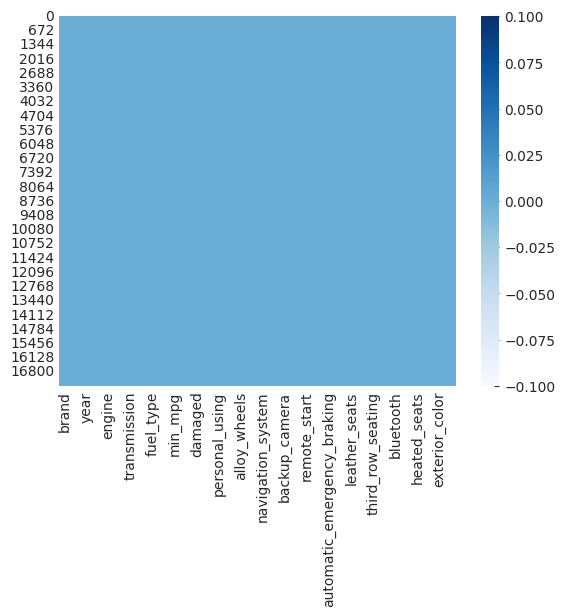

In [16]:
sns.heatmap(df1.isnull(), cmap='Blues')

In [17]:
df1.shape

(17468, 36)

In [18]:
df1.nunique()

brand                             25
model                           3115
year                              44
mileage                        16117
engine                           976
engine_size                       57
transmission                     149
automatic_transmission             2
fuel_type                          7
drivetrain                         4
min_mpg                           53
max_mpg                           55
damaged                            2
first_owner                        2
personal_using                     2
turbo                              2
alloy_wheels                       2
adaptive_cruise_control            2
navigation_system                  2
power_liftgate                     2
backup_camera                      2
keyless_start                      2
remote_start                       2
sunroof/moonroof                   2
automatic_emergency_braking        2
stability_control                  2
leather_seats                      2
m

In [19]:
# Checking the datatype
df1.dtypes

brand                           object
model                           object
year                           float64
mileage                        float64
engine                          object
engine_size                    float64
transmission                    object
automatic_transmission         float64
fuel_type                       object
drivetrain                      object
min_mpg                        float64
max_mpg                        float64
damaged                        float64
first_owner                    float64
personal_using                 float64
turbo                          float64
alloy_wheels                   float64
adaptive_cruise_control        float64
navigation_system              float64
power_liftgate                 float64
backup_camera                  float64
keyless_start                  float64
remote_start                   float64
sunroof/moonroof               float64
automatic_emergency_braking    float64
stability_control        

In [20]:
df1.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price'],
      dtype='object')

In [21]:
df1.iloc[42]

brand                                           FIAT
model                                      500 Sport
year                                          2012.0
mileage                                      79463.0
engine                         1.4L I4 16V MPFI SOHC
engine_size                                      1.4
transmission                       6-Speed Automatic
automatic_transmission                           1.0
fuel_type                                   Gasoline
drivetrain                         Front-wheel Drive
min_mpg                                         30.0
max_mpg                                         38.0
damaged                                          0.0
first_owner                                      0.0
personal_using                                   0.0
turbo                                            0.0
alloy_wheels                                     1.0
adaptive_cruise_control                          0.0
navigation_system                             

In [22]:
df1['price'] = df1['price'].str.replace(',', '').str.replace('ot Priced','')
df.dtypes

brand                           object
model                           object
year                           float64
mileage                        float64
engine                          object
engine_size                    float64
transmission                    object
automatic_transmission         float64
fuel_type                       object
drivetrain                      object
min_mpg                        float64
max_mpg                        float64
damaged                        float64
first_owner                    float64
personal_using                 float64
turbo                          float64
alloy_wheels                   float64
adaptive_cruise_control        float64
navigation_system              float64
power_liftgate                 float64
backup_camera                  float64
keyless_start                  float64
remote_start                   float64
sunroof/moonroof               float64
automatic_emergency_braking    float64
stability_control        

In [23]:
df1['price'] = pd.to_numeric(df1['price'])
df1['price'].dtype

dtype('float64')

In [24]:
df1.iloc[42]

brand                                           FIAT
model                                      500 Sport
year                                          2012.0
mileage                                      79463.0
engine                         1.4L I4 16V MPFI SOHC
engine_size                                      1.4
transmission                       6-Speed Automatic
automatic_transmission                           1.0
fuel_type                                   Gasoline
drivetrain                         Front-wheel Drive
min_mpg                                         30.0
max_mpg                                         38.0
damaged                                          0.0
first_owner                                      0.0
personal_using                                   0.0
turbo                                            0.0
alloy_wheels                                     1.0
adaptive_cruise_control                          0.0
navigation_system                             

In [25]:
df1.dropna(axis = 0, inplace=True)

In [26]:
df1.isnull().sum()

brand                          0
model                          0
year                           0
mileage                        0
engine                         0
engine_size                    0
transmission                   0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
min_mpg                        0
max_mpg                        0
damaged                        0
first_owner                    0
personal_using                 0
turbo                          0
alloy_wheels                   0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
third_row_seating              0
apple_car_play/android_auto    0
bluetooth 

In [27]:
print(df1.select_dtypes(include='object').nunique())
categorical_vars = df1.select_dtypes(include='object')
categorical_vars

brand               25
model             3114
engine             976
transmission       149
fuel_type            7
drivetrain           4
interior_color     904
exterior_color    1841
dtype: int64


,brand,model,engine,transmission,fuel_type,drivetrain,interior_color,exterior_color
0,Honda,Pilot Special Edition,3.5L V6 24V GDI SOHC,9-Speed Automatic,Gasoline,Four-wheel Drive,Black,Modern Steel Metallic
1,Mercedes-Benz,GL-Class GL 450 4MATIC,4.7L V8 32V GDI DOHC Twin Turbo,7-Speed Automatic,Gasoline,Four-wheel Drive,Black,Obsidian Black Metallic
2,Mitsubishi,Outlander Sport SE,2.0L I4 16V MPFI DOHC,Automatic CVT,Gasoline,Four-wheel Drive,Gray,Silver
3,Porsche,968,3.0L I4 16V MPFI DOHC,6-Speed Automatic,Gasoline,Rear-wheel Drive,Saddle,White
4,MINI,Hardtop Cooper,1.5L I3 12V GDI DOHC Turbo,6-Speed Automatic,Gasoline,Front-wheel Drive,Carbon Black,Electric Blue Metallic
...,...,...,...,...,...,...,...,...
17463,Land,Rover Range Rover Evoque SE,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Gasoline,Four-wheel Drive,Ebony,Santorini Black
17464,Mitsubishi,Outlander SE,"2.4L I-4 variable valve control, engine with 1...",Automatic,Gasoline,Four-wheel Drive,Black,Mercury Gray Metallic
17465,Nissan,GT-R Premium,"3.8L V-6 DOHC, variable valve control, twin tu...",Automatic,Gasoline,Four-wheel Drive,Black,Pearl White
17466,Maserati,Levante,3.0L V6 24V GDI DOHC Twin Turbo,8-Speed Automatic,Gasoline,Four-wheel Drive,Black,White


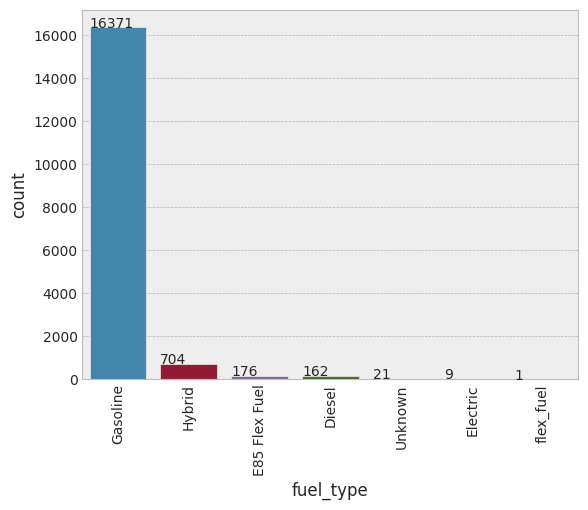

In [28]:
ax = sns.countplot(x='fuel_type', data = categorical_vars)
plt.xticks(rotation=90)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.style.use('bmh')

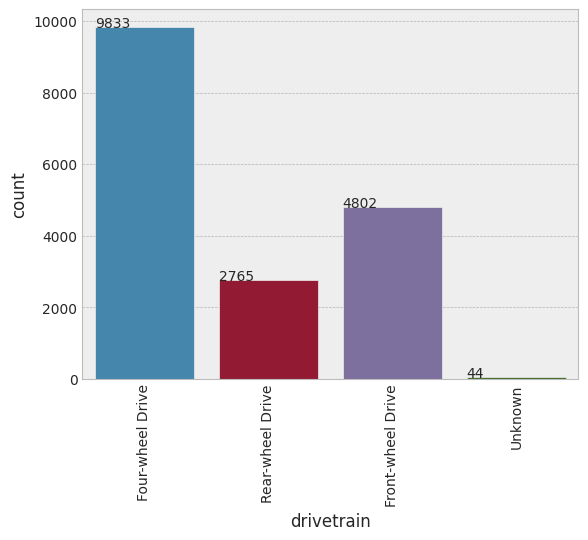

In [29]:
ax = sns.countplot(x='drivetrain', data = categorical_vars)
plt.xticks(rotation=90)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.style.use('bmh')

In [30]:
print(df1.select_dtypes(include='float').nunique())
numerical_vars = df1.select_dtypes(include='float')
numerical_vars

year                              44
mileage                        16094
engine_size                       57
automatic_transmission             2
min_mpg                           53
max_mpg                           55
damaged                            2
first_owner                        2
personal_using                     2
turbo                              2
alloy_wheels                       2
adaptive_cruise_control            2
navigation_system                  2
power_liftgate                     2
backup_camera                      2
keyless_start                      2
remote_start                       2
sunroof/moonroof                   2
automatic_emergency_braking        2
stability_control                  2
leather_seats                      2
memory_seat                        2
third_row_seating                  2
apple_car_play/android_auto        2
bluetooth                          2
usb_port                           2
heated_seats                       2
p

,year,mileage,engine_size,automatic_transmission,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,...,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,price
0,2021.0,51299.0,3.5,1.0,19.0,26.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,35999.0
1,2014.0,79279.0,4.7,1.0,21.0,28.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,22349.0
2,2021.0,31976.0,2.0,1.0,24.0,31.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19499.0
3,1994.0,92025.0,3.0,1.0,10.0,16.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12960.0
4,2016.0,43418.0,1.5,1.0,21.0,31.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,2016.0,106438.0,2.0,1.0,20.0,25.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,16495.0
17464,2019.0,56555.0,2.4,1.0,22.0,30.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,23988.0
17465,2015.0,12091.0,3.8,1.0,17.0,24.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,92995.0
17466,2021.0,31187.0,3.0,1.0,14.0,19.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,49850.0


In [31]:
numerical_vars.columns

Index(['year', 'mileage', 'engine_size', 'automatic_transmission', 'min_mpg',
       'max_mpg', 'damaged', 'first_owner', 'personal_using', 'turbo',
       'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'price'],
      dtype='object')

In [32]:
num_var = numerical_vars[['damaged', 'first_owner', 'personal_using', 'turbo',
       'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats']]
num_var

,damaged,first_owner,personal_using,turbo,alloy_wheels,adaptive_cruise_control,navigation_system,power_liftgate,backup_camera,keyless_start,...,sunroof/moonroof,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
17464,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
17465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
17466,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


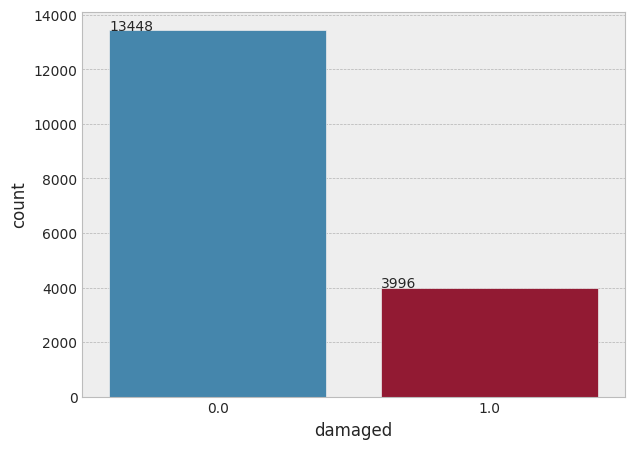

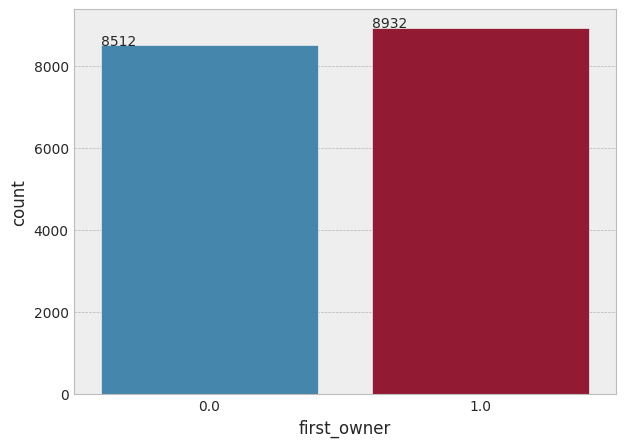

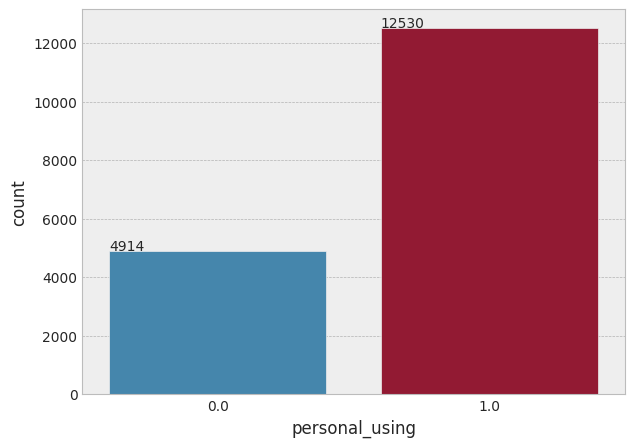

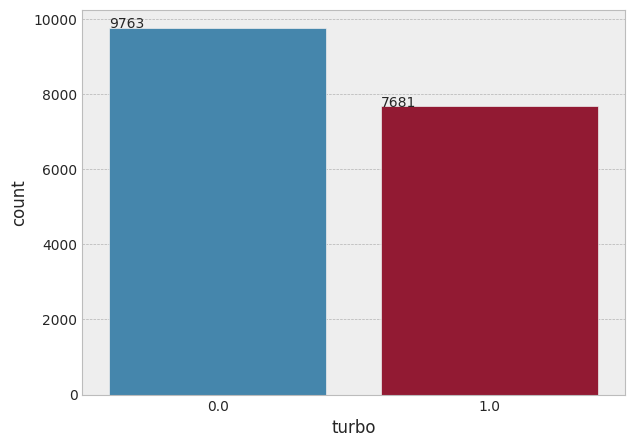

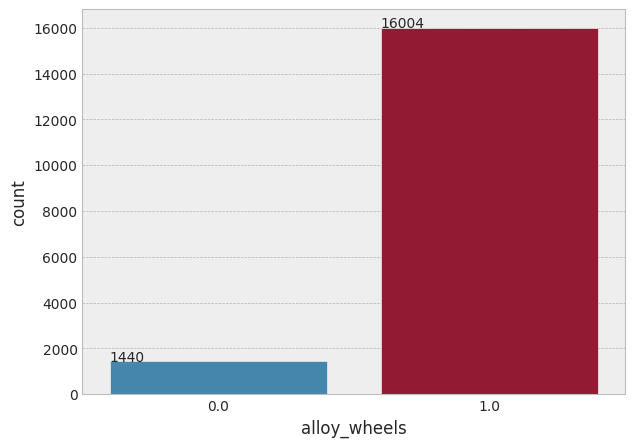

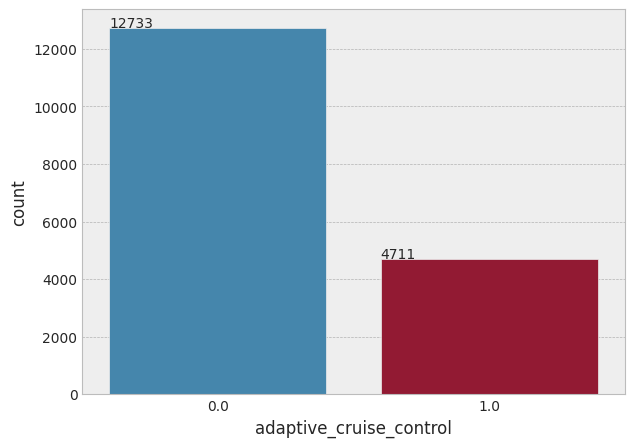

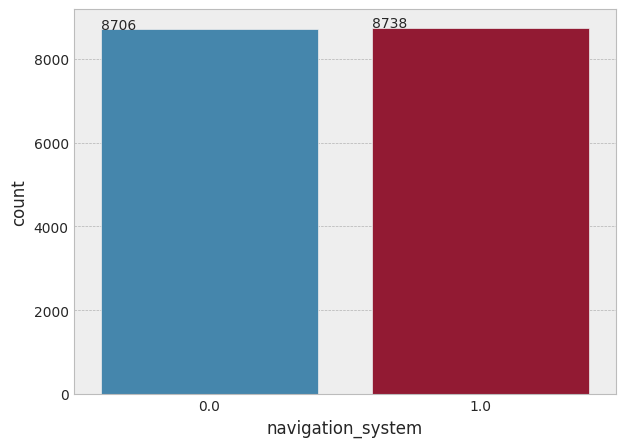

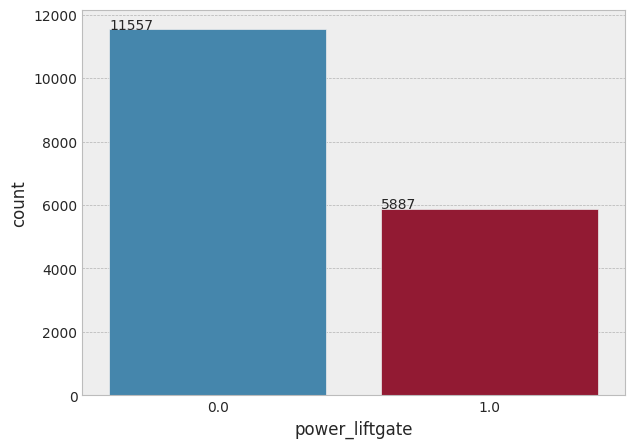

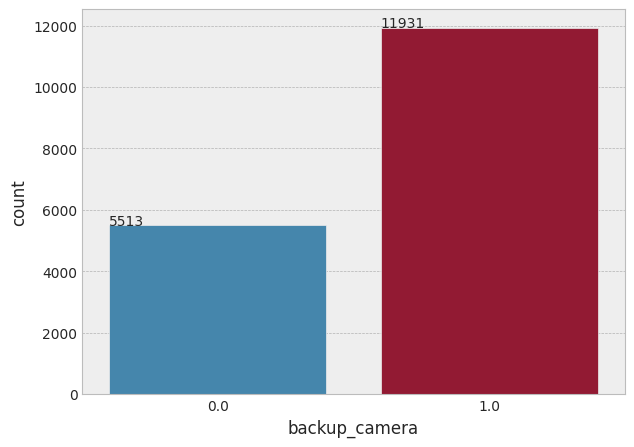

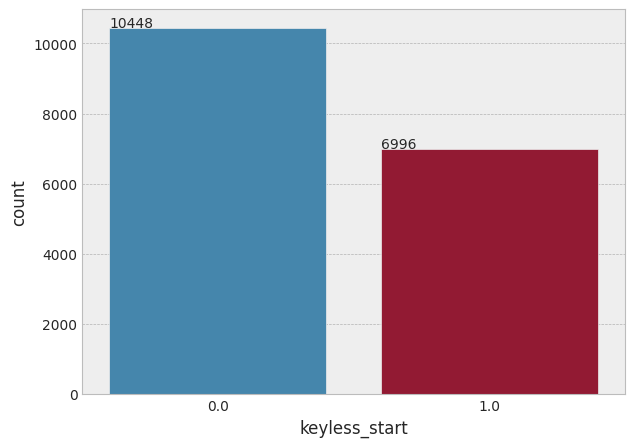

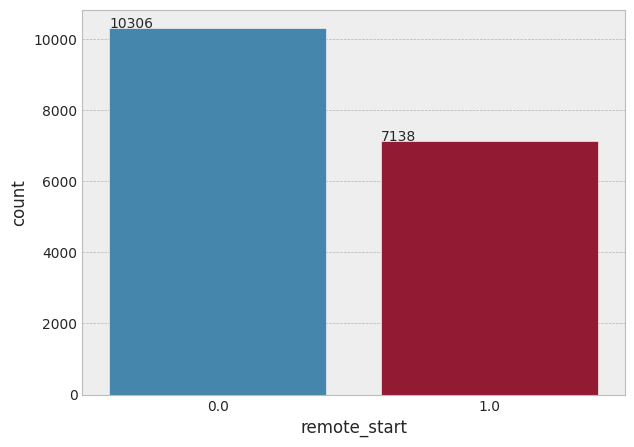

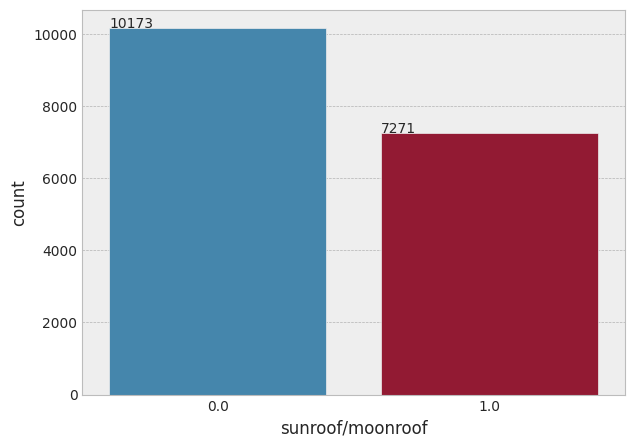

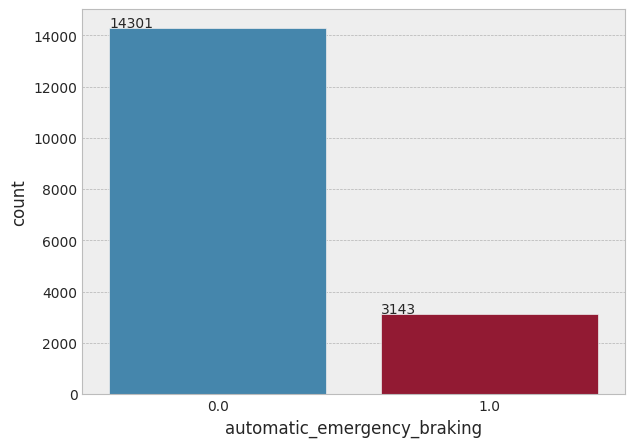

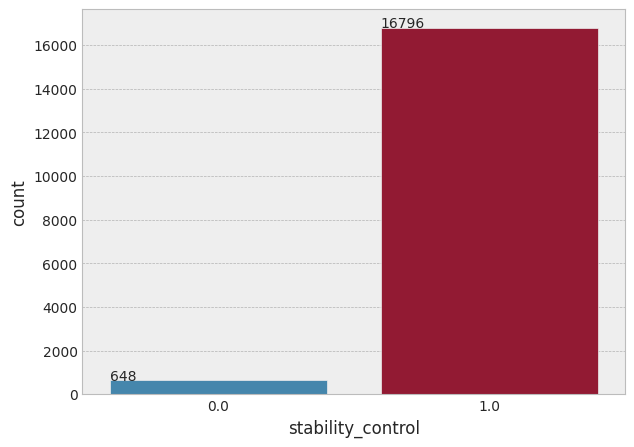

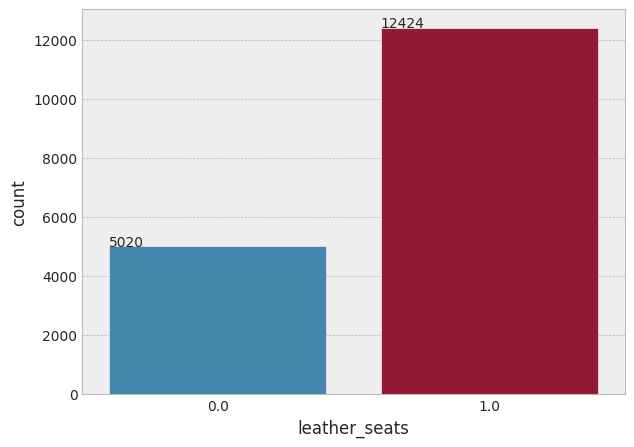

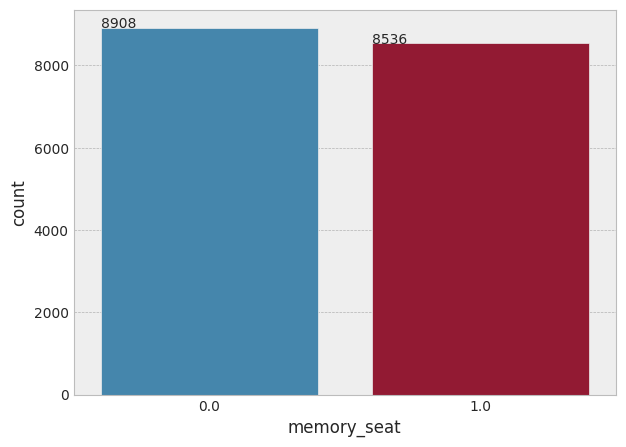

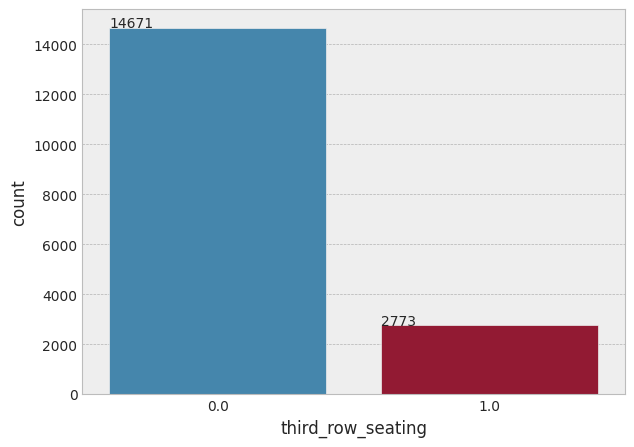

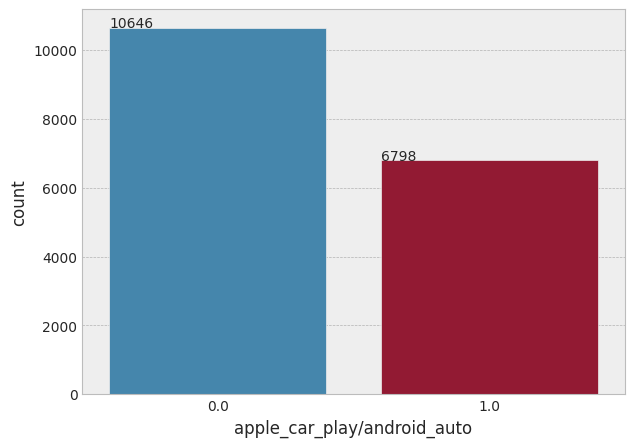

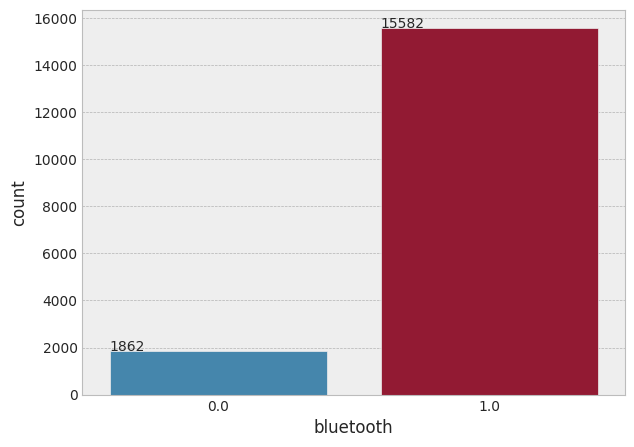

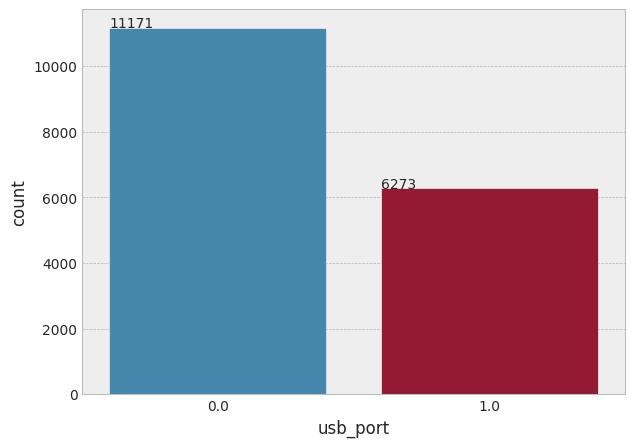

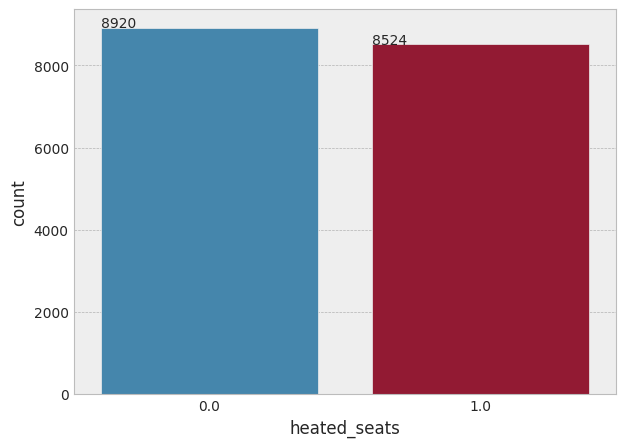

In [33]:
for i in num_var:
  plt.figure(figsize=(7,5))
  ax = sns.countplot(x=num_var[i], data=num_var)
  for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
sns.set_style('whitegrid')
plt.style.use('bmh')

# Label Encoding for the Object Datatypes

In [34]:
#Splitting into dependent and independent variable
x = df1.drop('price', axis=1)
y = df1['price']


## Label Encoding

In [35]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


#looping over each columns in the dataframe where datatypes is object
for i in x.select_dtypes(include=['object']).columns:

  #Initializing the labelencoder
  encoder = LabelEncoder()

  #Fitting the label encoder
  encoder.fit(x[i].unique())

  #Transformation
  x[i] = encoder.transform(x[i])

#print the df
x.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color
0,7,1905,2021.0,51299.0,452,3.5,84,1.0,3,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,77,1052
1,17,1175,2014.0,79279.0,614,4.7,57,1.0,3,0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,77,1154
2,18,1823,2021.0,31976.0,150,2.0,109,1.0,3,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,428,1496
3,20,198,1994.0,92025.0,351,3.0,32,1.0,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,736,1766
4,14,1374,2016.0,43418.0,40,1.5,32,1.0,3,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,206,598


## Feature Scaling

In [36]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)
x = pd.DataFrame(x,columns=df1.drop('price',axis=1).columns)
x.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color
0,-0.624677,0.447198,0.738608,0.053990,0.546656,0.128544,0.598064,0.28811,0.013621,-0.793025,...,0.196419,0.635655,1.021558,2.300143,1.251419,0.345683,-0.749362,1.022965,-0.810343,0.279443
1,0.771964,-0.380692,-0.874548,0.805256,1.273838,0.386823,-0.280975,0.28811,0.013621,-0.793025,...,0.196419,0.635655,1.021558,2.300143,-0.799093,0.345683,-0.749362,-0.977551,-0.810343,0.462772
2,0.911628,0.354202,0.738608,-0.464834,-0.808957,-0.194303,1.411989,0.28811,0.013621,-0.793025,...,0.196419,-1.573182,-0.978897,-0.434755,-0.799093,0.345683,-0.749362,-0.977551,0.550389,1.077463
3,1.190956,-1.488703,-5.483563,1.147488,0.093289,0.020928,-1.094900,0.28811,0.013621,1.850998,...,-5.091145,0.635655,-0.978897,-0.434755,-0.799093,-2.892822,-0.749362,-0.977551,1.744422,1.562745
4,0.352971,-0.155007,-0.413646,-0.157615,-1.302723,-0.301919,-1.094900,0.28811,0.013621,0.528986,...,0.196419,0.635655,-0.978897,-0.434755,-0.799093,0.345683,1.334469,-0.977551,-0.310245,-0.536551


# Correlation Heatmap

<Axes: >

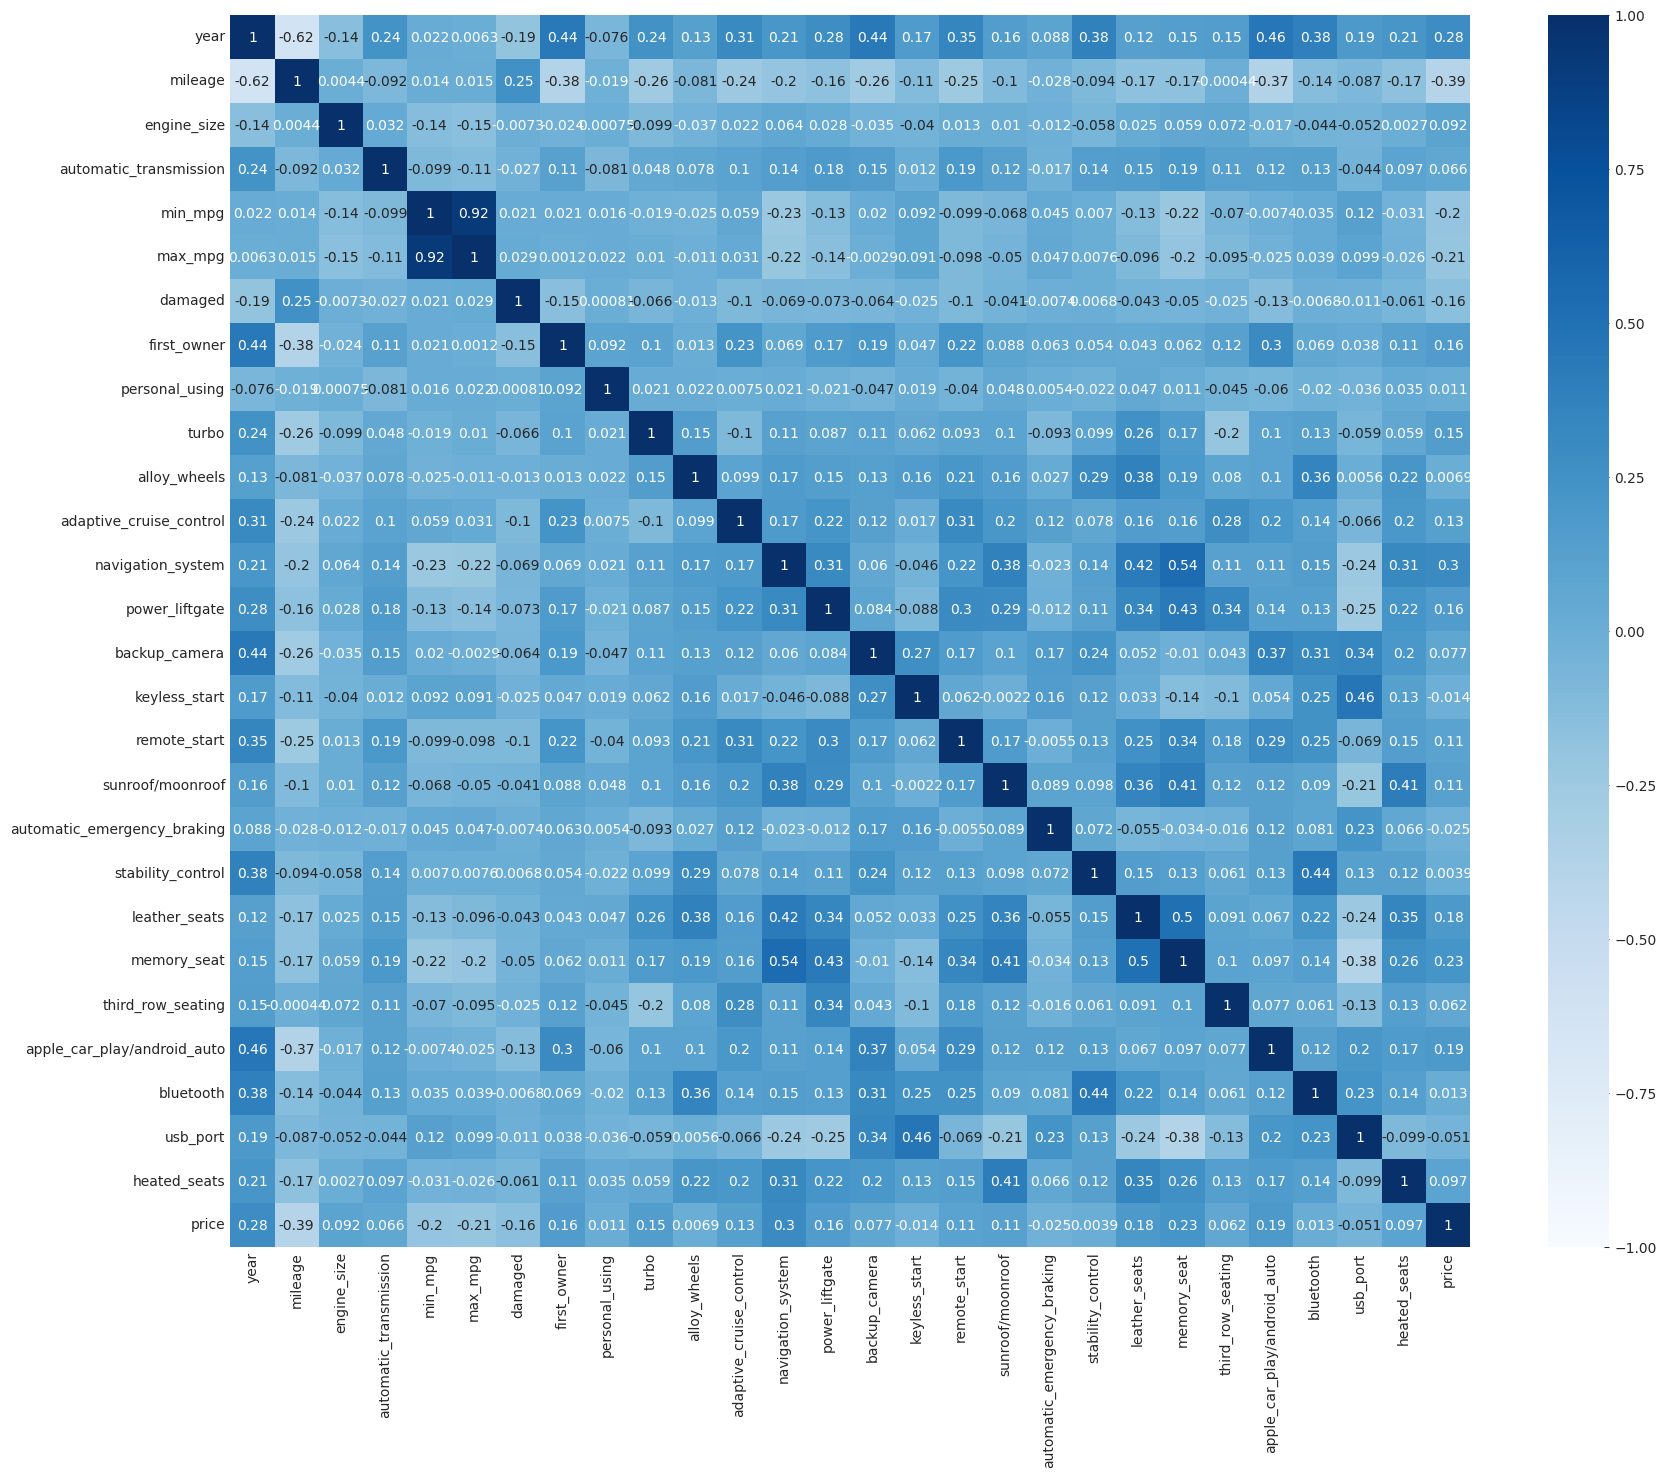

In [37]:
plt.figure(figsize=(20,16))
corr = df1.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='Blues',annot=True)

# Train Test Split

In [38]:
#Train set will be 80% while the test set will be 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
metrics_score = []

#Spltting of the set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13955, 35)
(3489, 35)
(13955,)
(3489,)


## Decision Tree Regressor

In [39]:
#import the libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

#Define the hyperparameters
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto','sqrt','log2']
}

#Lets create the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

#Fitting
grid_search.fit(x_train, y_train)

#Checking the best hyperparameters
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state= 0, max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=4)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=4, random_state=0)

In [41]:
y_pred = dtree.predict(x_test)
y_pred

array([15845.15384615, 27397.48081841, 29689.2739726 , ...,
       35570.91262136, 25444.63513514, 43612.4       ])

In [42]:
from sklearn import metrics
import math
dt_mse = metrics.mean_squared_error(y_test,y_pred)
dt_mae = metrics.mean_absolute_error(y_test,y_pred)
dt_r2 = metrics.r2_score(y_test,y_pred)
dt_rmse = math.sqrt(dt_mse)

print('MSE is {}'.format(dt_mse))
print('MAE is {}'.format(dt_mae))
print('R2 is {}'.format(dt_r2))
print('RMSE is {}'.format(dt_rmse))


metrics_score.append(dt_mse * 100)
metrics_score.append(dt_mae * 100)
metrics_score.append(dt_r2)
metrics_score.append(dt_rmse * 100)

MSE is 438161061.9192889
MAE is 7068.975484154903
R2 is 0.43445646109272107
RMSE is 20932.297100874737


# Feature Importance

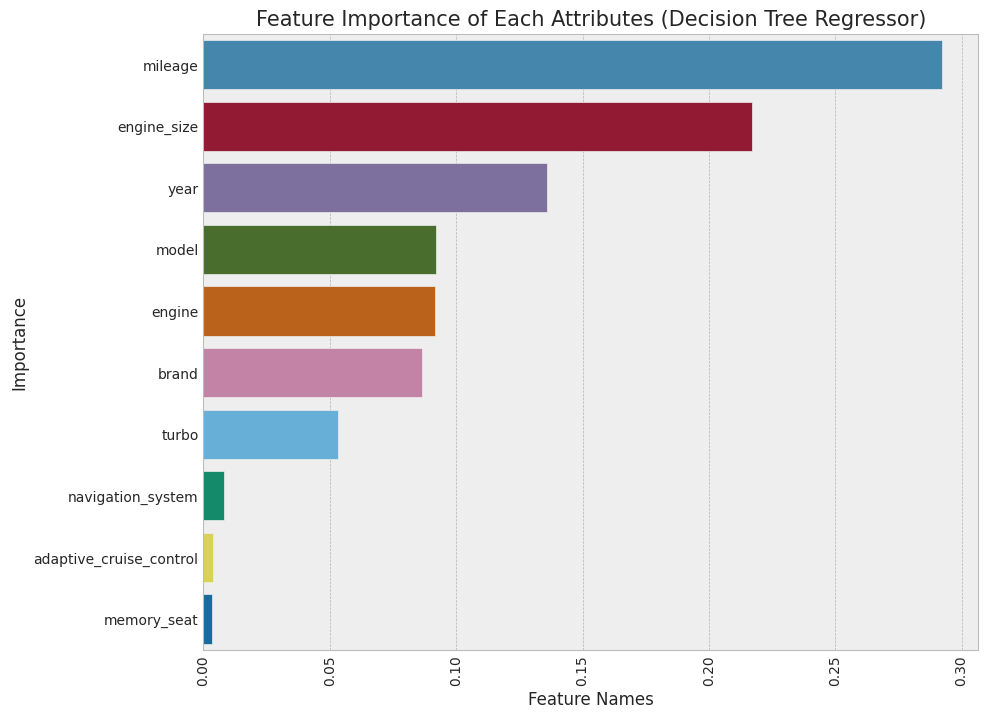

In [43]:
imp_df = pd.DataFrame({
    'Feature Name': pd.DataFrame(x_train).columns,
    'Importance': dtree.feature_importances_
})

fi = imp_df.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x ='Importance',y='Feature Name')
plt.title('Feature Importance of Each Attributes (Decision Tree Regressor)',fontsize=15)
plt.xlabel('Feature Names')
plt.xticks(rotation=90)
plt.ylabel('Importance')

plt.show()

# Random Forest Regressor

In [44]:
# import the libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

In [45]:
#Fitting
rf.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
#Prediction
rf_pred = rf.predict(x_test)
print(rf_pred)

from sklearn import metrics
import math
rf_mse = metrics.mean_squared_error(y_test,rf_pred)
rf_mae = metrics.mean_absolute_error(y_test,rf_pred)
rf_r2 = metrics.r2_score(y_test,rf_pred)
rf_rmse = math.sqrt(rf_mse)

print('MSE is {}'.format(rf_mse))
print('MAE is {}'.format(rf_mae))
print('R2 is {}'.format(rf_r2))
print('RMSE is {}'.format(rf_rmse))

metrics_score.append(rf_mse * 100)
metrics_score.append(rf_mae * 100)
metrics_score.append(rf_r2)
metrics_score.append(rf_rmse * 100)

[34011.92 25562.28 28265.18 ... 34079.08 25436.45 49091.98]
MSE is 405382917.10245174
MAE is 5085.836279736314
R2 is 0.47676389009457987
RMSE is 20134.123201730235


## Gradient Boosting Regressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

#Training
GBR.fit(x_train,y_train)

#Prediction
GBR_pred = GBR.predict(x_test)
print(GBR_pred)

print('***' *30)
from sklearn import metrics
import math
gbr_mse = metrics.mean_squared_error(y_test,GBR_pred)
gbr_mae = metrics.mean_absolute_error(y_test,GBR_pred)
gbr_r2 = metrics.r2_score(y_test,GBR_pred)
gbr_rmse = math.sqrt(gbr_mse)

print('MSE is {}'.format(gbr_mse))
print('MAE is {}'.format(gbr_mae))
print('R2 is {}'.format(gbr_r2))
print('RMSE is {}'.format(gbr_rmse))

metrics_score.append(gbr_mse * 100)
metrics_score.append(gbr_mae * 100)
metrics_score.append(gbr_r2)
metrics_score.append(gbr_rmse * 100)

[57714.46103407 27269.76952061 27208.21224417 ... 36543.23346787
 39998.27828771 48034.6954281 ]
******************************************************************************************
MSE is 305351895.2778703
MAE is 6472.9868286319
R2 is 0.6058759974903891
RMSE is 17474.321024802946


#Accuracy Check

### Decision Tree Accuracy

In [69]:
dtree_train_acc = dtree.score(x_train, y_train)
print('Training Accuracy :', dtree.score(x_train, y_train))
dtree_test_acc = dtree.score(x_test, y_test)
print('Testing Accuracy :', dtree.score(x_test, y_test))

Training Accuracy : 0.6400730474433721
Testing Accuracy : 0.43445646109272107


### Random Forest Accuracy

In [70]:
rf_train_acc = rf.score(x_train, y_train)
print('Training Accuracy :', rf.score(x_train, y_train))
rf_test_acc = rf.score(x_test, y_test)
print('Testing Accuracy :', rf.score(x_test, y_test))

Training Accuracy : 0.9377186613860334
Testing Accuracy : 0.47676389009457987


### Gradient Boosting Accuracy

In [71]:
GBR_train_acc = GBR.score(x_train, y_train)
print('Training Accuracy :', GBR.score(x_train, y_train))
GBR_test_acc = GBR.score(x_test, y_test)
print('Testing Accuracy :', GBR.score(x_test, y_test))

Training Accuracy : 0.8693346667075357
Testing Accuracy : 0.6058759974903891


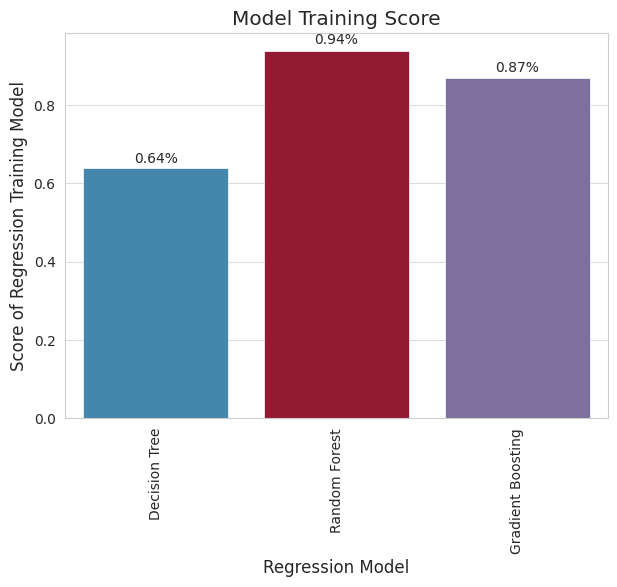

In [76]:
train_score_list = []

train_score_list.append(dtree_train_acc)
train_score_list.append(rf_train_acc)
train_score_list.append(GBR_train_acc)

train_score_model_list = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(7,5))
ax = sns.barplot(y = train_score_list, x = train_score_model_list)
plt.title("Model Training Score")
plt.xlabel('Regression Model')
plt.ylabel("Score of Regression Training Model")
for i in ax.patches:
  width, height=i.get_width(), i.get_height()
  x, y=i.get_xy()
  ax.annotate(f'{round(height,2)}%', (x+width/2, y+height*1.02), ha ='center')
  plt.xticks(rotation=90)

plt.show()

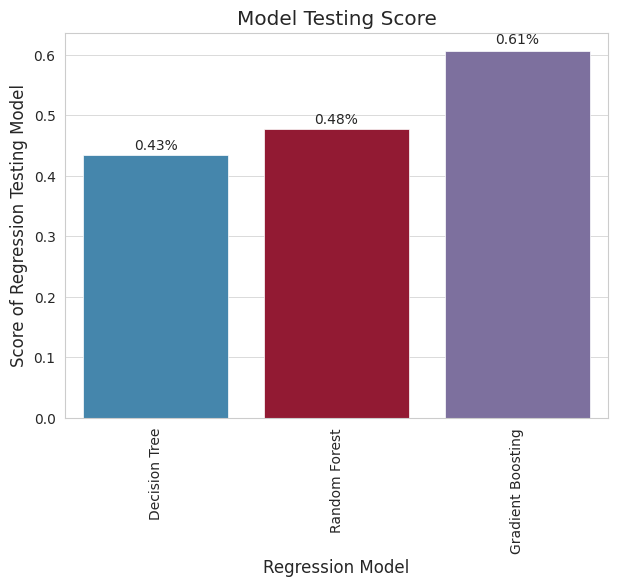

In [77]:
test_score_list = []

test_score_list.append(dtree_test_acc)
test_score_list.append(rf_test_acc)
test_score_list.append(GBR_test_acc)

test_score_model_list = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(7,5))
ax = sns.barplot(y = test_score_list, x = test_score_model_list)
plt.title("Model Testing Score")
plt.xlabel('Regression Model')
plt.ylabel("Score of Regression Testing Model")
for i in ax.patches:
  width, height=i.get_width(), i.get_height()
  x, y=i.get_xy()
  ax.annotate(f'{round(height,2)}%', (x+width/2, y+height*1.02), ha ='center')
  plt.xticks(rotation=90)

plt.show()

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert--to PDF 'Used Car Listings: Features and Price Prediction.ipynb'